[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/NumEconNotebooks/master?urlpath=lab/tree/micro/05_Edgeworth.ipynb)

# Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import ipywidgets as widgets

import numecon.micro.edgeworth as edgeworth

# Static: Walras equilbrium in Edgeworth box

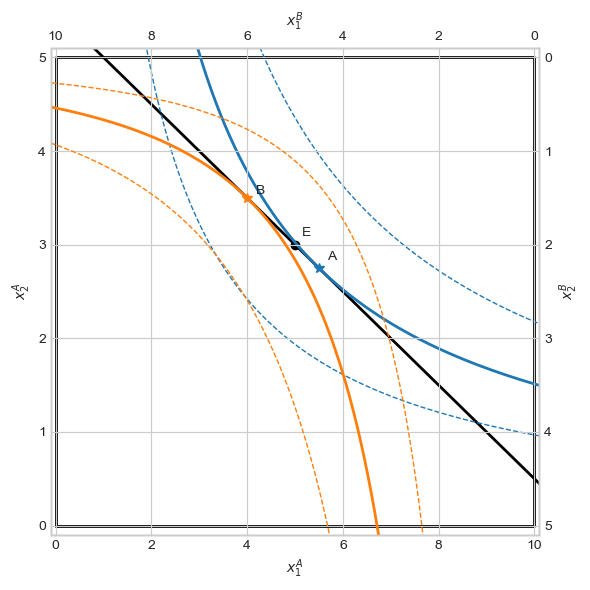

In [2]:
consumerA = {}
consumerA['preferences'] = 'cobb_douglas'
consumerA['alpha'] = 1
consumerA['beta'] = 1

consumerB = {}
consumerB['preferences'] = 'cobb_douglas'
consumerB['alpha'] = 2
consumerB['beta'] = 1

model = edgeworth.EdgeworthModel(consumerA,consumerB,p1=1,p2=2,eA=(5,3),eB=(5,2))
model.walras_figure(xAs=[]);

# Static: Contract curve in Edgeworth box

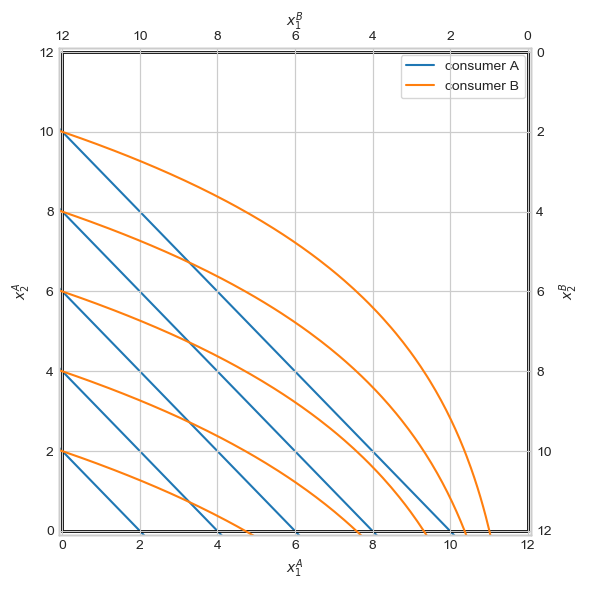

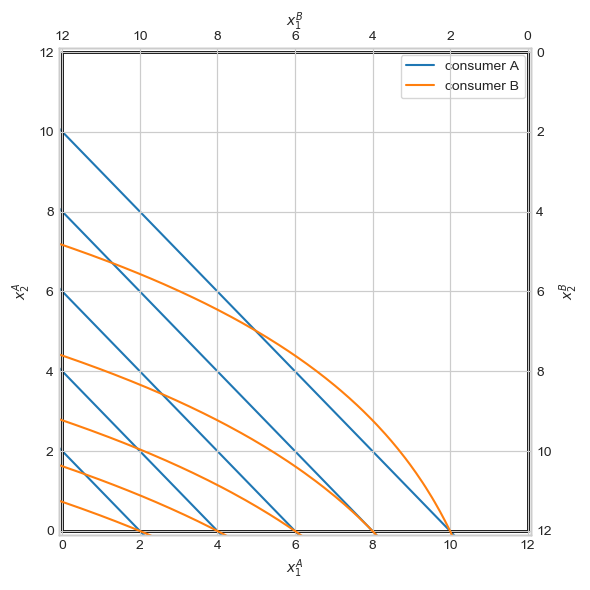

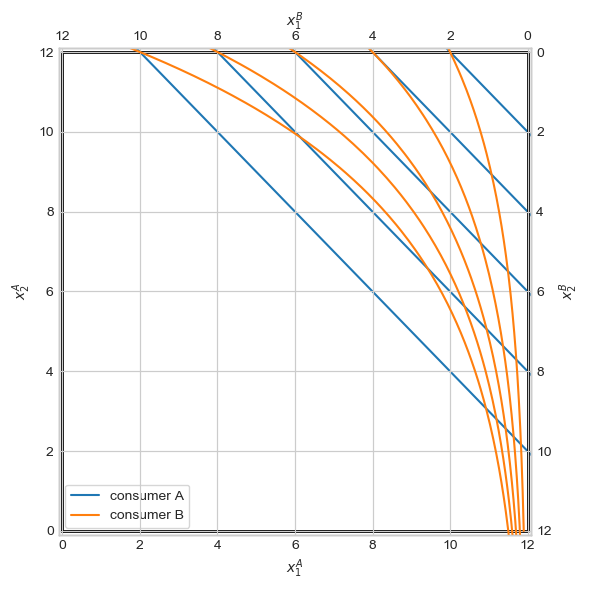

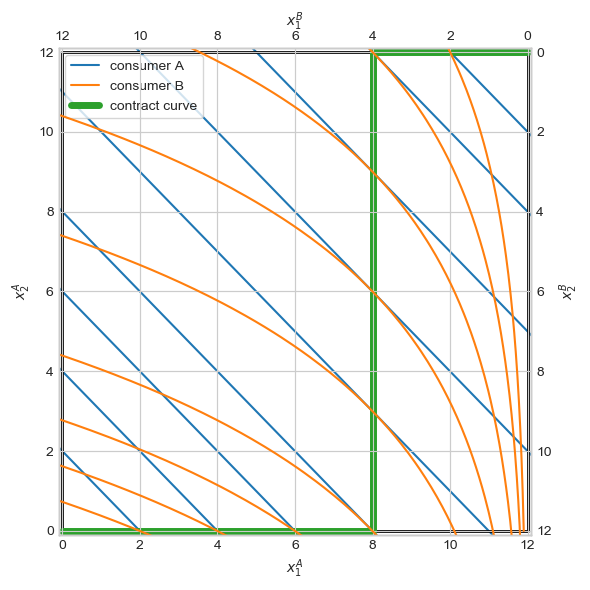

In [3]:
consumerA = {}
consumerA['preferences'] = 'perfect_substitutes'
consumerA['alpha'] = 1
consumerA['beta'] = 1

consumerB = {}
consumerB['preferences'] = 'quasi_log'
consumerB['alpha'] = 4
consumerB['beta'] = 1

model = edgeworth.EdgeworthModel(consumerA,consumerB,eA=(6,6),eB=(6,6))
fig,ax,_ = model.pareto_figure(xAs=[(0,2),(0,4),(0,6),(0,8),(0,10)])
model.legend(ax,loc='upper right')

model = edgeworth.EdgeworthModel(consumerA,consumerB,eA=(6,6),eB=(6,6))
fig,ax,_ = model.pareto_figure(xAs=[(2,0),(4,0),(6,0),(8,0),(10,0)])
model.legend(ax,loc='upper right')

model = edgeworth.EdgeworthModel(consumerA,consumerB,eA=(6,6),eB=(6,6))
fig,ax,_ = model.pareto_figure(xAs=[(2,12),(4,12),(6,12),(8,12),(10,12)])
model.legend(ax,loc='lower left')

fig,ax,_ = model.pareto_figure(xAs=[(2,0),(4,0),(6,0),(8,0),(8,3),(8,6),(8,9),(8,12),(10,12)])
ax.plot([0,8],[0,0],lw='5',color=colors[2])
ax.plot([8,12],[12,12],lw='5',color=colors[2])
ax.plot([8,8],[0,12],lw='5',color=colors[2],label='contract curve')
model.legend(ax,loc='upper left')

# Be your own auctionarius!

We consider a normalized Edgeworth-economy ($e_1 = e_2 = 1$), where $\omega_1$ and $\omega_2$ are the shares of good 1 and 2 held by consumer $A$. Both consumers have CES preferences. We normalize $p_2 = 1$.

In [4]:
edgeworth.interactive_walras(preferences_A='cobb_douglas',preferences_B='quasi_log',p1=1.5)

interactive(children=(BoundedFloatText(value=1.5, description='$p_1$', max=4.0, min=0.05, step=0.05), FloatSli…

# Algorithmic solution

**Algorithm:**

In [5]:
def excess_demand_x2(p1,a):
    
    I = p1*k + 1
    x2 = (1-a)*I
    z2 = x2-1
    return z2

def iterate(p1_guess,N=10000,mu_1=0.25,mu_2=0.75,k=5,eps=1e-8, kappa=0.1,maxiter=50):

    # a. draw preferences
    a = np.random.uniform(low=mu_1,high=mu_2,size=N)
    
    # b. iterate
    t = 0
    while True:
    
        if t == 0:
            p1 = p1_guess
        else:
            p1 = p1 - kappa*z2/N
    
        z2 = np.sum(excess_demand_x2(p1,a))
        print(f'{t:3d}: p1 = {p1:12.8f} -> z2 -> {z2:14.8f}')
        time.sleep(1)
        
        if t >= maxiter or np.abs(z2) < eps:
            break
        t += 1
    

**Run:**

In [6]:
# a. settings
N = 10000
mu_1 = 0.25
mu_2 = 0.75
k = 5
eps = 1e-8
kappa = 0.5
p1_guess = 0.24

# b. analytical solution
mu = mu_1 + (mu_2-mu_1)/2
p1_analytical = (mu/(1-mu))/k
print(f'analytical result: p1 = {p1_analytical:.8f}')

# c. algorithmic solution
p1_guess = p1_analytical*1.2
iterate(p1_guess,N,mu_1,mu_2,k,eps,kappa)

analytical result: p1 = 0.20000000
  0: p1 =   0.24000000 -> z2 ->  1030.77774469
  1: p1 =   0.18846111 -> z2 ->  -261.29955143
  2: p1 =   0.20152609 -> z2 ->    66.23877546
  3: p1 =   0.19821415 -> z2 ->   -16.79136206
  4: p1 =   0.19905372 -> z2 ->     4.25656782
  5: p1 =   0.19884089 -> z2 ->    -1.07902918
  6: p1 =   0.19889484 -> z2 ->     0.27353117
  7: p1 =   0.19888117 -> z2 ->    -0.06933946
  8: p1 =   0.19888463 -> z2 ->     0.01757738
  9: p1 =   0.19888375 -> z2 ->    -0.00445582
 10: p1 =   0.19888398 -> z2 ->     0.00112954
 11: p1 =   0.19888392 -> z2 ->    -0.00028634
 12: p1 =   0.19888393 -> z2 ->     0.00007259
 13: p1 =   0.19888393 -> z2 ->    -0.00001840
 14: p1 =   0.19888393 -> z2 ->     0.00000466
 15: p1 =   0.19888393 -> z2 ->    -0.00000118
 16: p1 =   0.19888393 -> z2 ->     0.00000030
 17: p1 =   0.19888393 -> z2 ->    -0.00000008
 18: p1 =   0.19888393 -> z2 ->     0.00000002
 19: p1 =   0.19888393 -> z2 ->    -0.00000000
